## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

## Functions to Generate and Visualize Cities

In [2]:
def generate_cities(n_cities):
    # Initialize random points in the unit square
    cities = np.random.uniform(-1,1,(n_cities,2))
    # Starting city is also last city
    cities = np.vstack((cities, cities[0,:]))
    return cities

def visualize_cities(cities, title, path=True):
    fig = plt.figure()
    # Scatter plot of city locations
    plt.scatter(cities[:,0],cities[:,1])
    if path:
        # Draw line for tour
        plt.plot(cities[:,0], cities[:,1], 'r')
    plt.xlim(-1.0, 1.0)
    plt.ylim(-1.0, 1.0)
    plt.title(title)
    return fig

def visualize_lengths(tourLengthArray, greedyLength=None):
    # Plot tour length as function of iteration
    fig = plt.figure()
    plt.semilogx(tourLengthArray[:,0],tourLengthArray[:,1], label='Annealing')
    if greedyLength is not None:
        # If greedy tour length is provided, plot as a baseline
        plt.semilogx(tourLengthArray[:,0],[greedyLength,]*len(tourLengthArray), label='Greedy')
    plt.legend()
    plt.xlabel('Iteration')
    plt.ylabel('Tour Length')
    plt.title('Convergence of Simulated Annealing')
    return fig

## Functions for Metropolis Algorithm

In [3]:
def tour_length(cities):
    # Calculate length of tour
    deltaX = np.ediff1d(cities[:,0])
    deltaY = np.ediff1d(cities[:,1])
    distances = np.sqrt(deltaX**2 + deltaY**2)
    length = np.sum(distances)
    return length

def metropolis_h(u):
    # Use metropolis function h(u) = u/(1+u)
    return u/(1.0+u)

def sample_new_tour(cities):
    nCities = len(cities) - 1
    # Take city i and place it after city j in the tour
    i = np.random.randint(1, nCities)
    j = np.random.choice([j for j in range(1, nCities) if j!=i])
    i1 = min(i,j)
    j1 = max(i,j)
    newTour = np.vstack((cities[:i1], 
                         np.flip(cities[i1:j1+1], axis=0), 
                         cities[j1+1:]))
    return newTour

def metropolis_step(tour, T):
    # Generate a modified tour
    newTour = sample_new_tour(tour)
    # Find change in tour length
    deltaLength = tour_length(tour) - tour_length(newTour)
    # Calculate acceptance rate
    h_arg = np.exp(deltaLength/T)
    h = metropolis_h(h_arg)
    # Determine if modified tour should be accepted
    u = np.random.uniform(0,1)
    if u < h:
        # Accept modified tour
        tour = newTour
    else:
        # Reject modified tour
        pass
    return tour

def run_metropolis(cities, nSteps):
    # Generate initial tour
    tour = np.copy(cities)
    # Initialize storage array
    tourLengths = np.zeros((1+nSteps,2))
    tourLengths[0,:] = [0, tour_length(tour)]
    # Initialize temperature constant C
    C = 1.0 # Experimentally, this value seems to work well
    # Iterate Metropolis algorithm
    for n in range(1, nSteps+1):
        # Change temperature based on step number
        T = C / max(.001, np.log(n))
        # Find new tour
        tour = metropolis_step(tour, T)
        # Store tour length
        tourLengths[n,:] = [n, tour_length(tour)]
    return tour, tourLengths

## Greedy Algorithm (for comparison)

In [4]:
def greedy_tour(cities):
    # Create list of unique cities
    uniqueCities = cities[:-1]
    nCities = len(uniqueCities)
    # Initialize tour with starting/ending city
    tour = np.zeros((nCities+1, 2))
    tour[0,:] = uniqueCities[0,:]
    tour[-1,:] = uniqueCities[0,:]
    toVisitCities = np.full(nCities, True)
    toVisitCities[0] = False
    # Build tour greedily
    for i in range(nCities-1):
        # Find current city and cities that have not been visited
        currentCity = tour[i]
        availableCities = uniqueCities[toVisitCities]
        # Compute distance to each unvisited city
        distances = np.sqrt( (availableCities[:,0] - currentCity[0])**2 
                             + (availableCities[:,1] - currentCity[1])**2)
        # Find closest city and add to tour
        closestCityIndex = np.argmin(distances)
        closestCity = availableCities[closestCityIndex]
        tour[i+1,:] = closestCity
        # Remove the closest city from the list of unvisited cities
        ind = (uniqueCities == closestCity)[:,0]
        toVisitCities[ind] = False
    return tour

## High Level Wrapper

In [5]:
def traveling_salesman(nCities):
    t1 = time()
    # Generate and visualize cities
    cities = generate_cities(nCities)
    fig1 = visualize_cities(cities, "Cities", path=False)
    # Perform greedy algorithm
    greedyTour = greedy_tour(cities)
    greedyLength = tour_length(greedyTour)
    fig2 = visualize_cities(greedyTour, "Greedy Tour")
    print("Greedy Algorithm, Tour Length = %s" % greedyLength)
    # Perform simulated annealing
    finalTour, tourLengths = run_metropolis(cities, 10**6)
    fig3 = visualize_cities(finalTour, "Simulated Annealing, Final Tour")
    fig4 = visualize_lengths(tourLengths, greedyLength)
    print("Simulated Annealing, Final Tour Length = %s" % tourLengths[-1,1])
    t2 = time()
    print("Runtime = %s" % (t2-t1))
    # Display visualizations
    plt.show(fig1)
    plt.show(fig2)
    plt.show(fig3)
    plt.show(fig4)
    return

## Visualizations for 10 Cities

Greedy Algorithm, Tour Length = 5.561391259239517
Simulated Annealing, Final Tour Length = 5.107074607431278
Runtime = 147.8724205493927


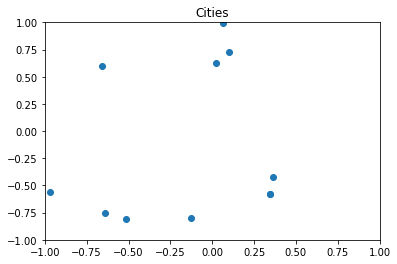

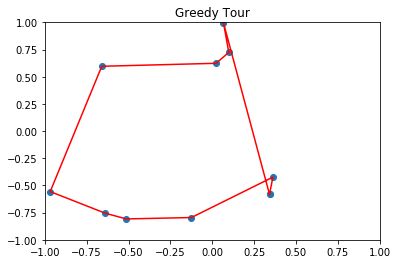

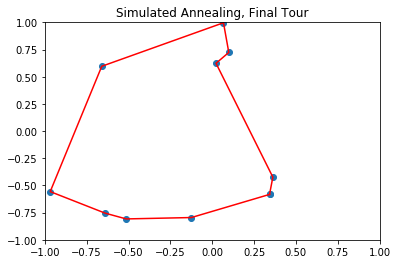

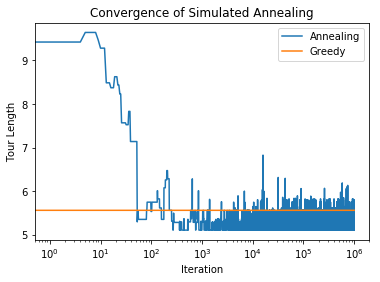

In [6]:
traveling_salesman(10)

## Visualizations for 20 Cities

Greedy Algorithm, Tour Length = 8.786939583954926
Simulated Annealing, Final Tour Length = 8.385118083788548
Runtime = 151.12171959877014


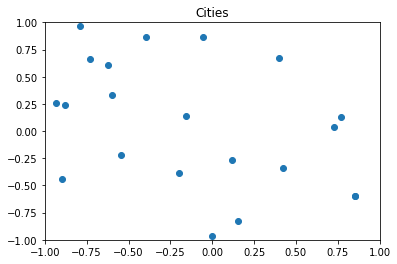

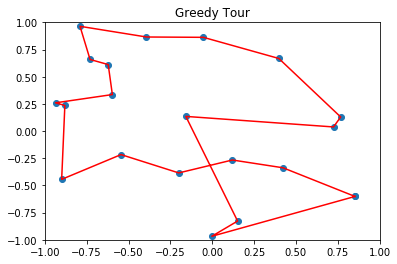

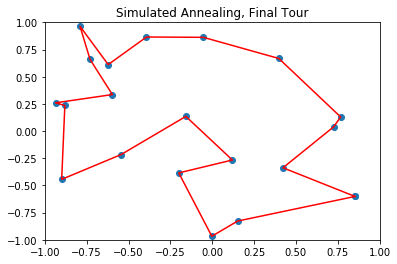

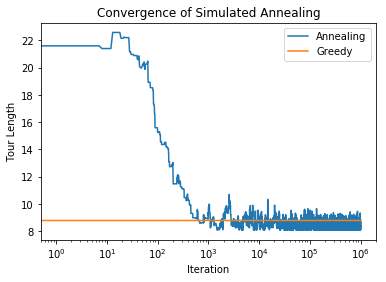

In [7]:
traveling_salesman(20)

## Visualizations for 30 Cities

Greedy Algorithm, Tour Length = 10.531763077595858
Simulated Annealing, Final Tour Length = 9.722354123465307
Runtime = 153.30850172042847


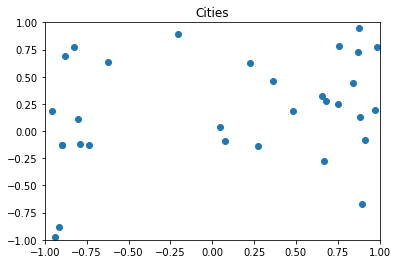

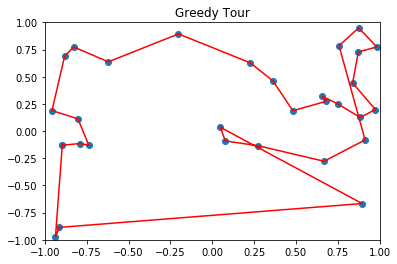

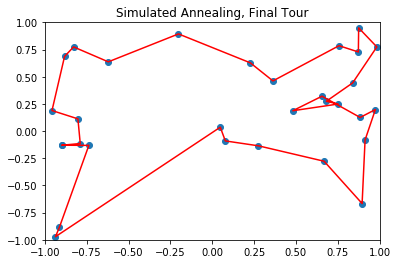

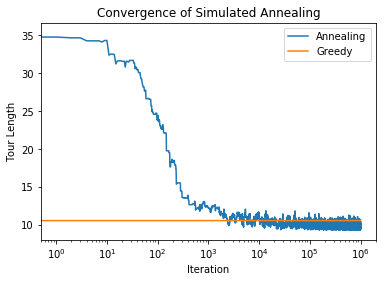

In [8]:
traveling_salesman(30)

## Visualizations for 50 Cities

Greedy Algorithm, Tour Length = 14.652900198136425
Simulated Annealing, Final Tour Length = 12.450695903788208
Runtime = 162.1992118358612


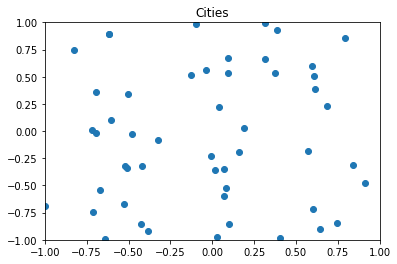

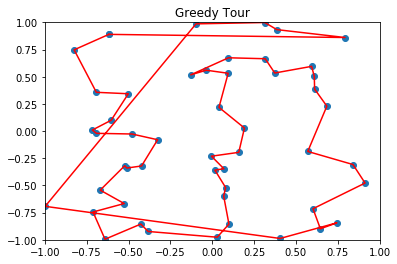

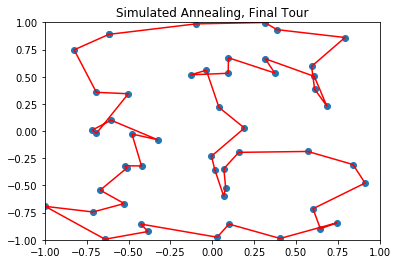

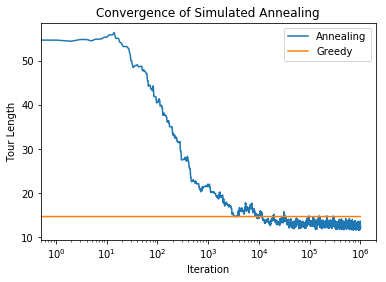

In [9]:
traveling_salesman(50)

## Visualizations for 100 Cities

Greedy Algorithm, Tour Length = 16.367506154608407
Simulated Annealing, Final Tour Length = 18.638708093959323
Runtime = 171.80516505241394


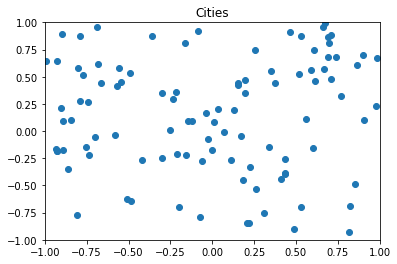

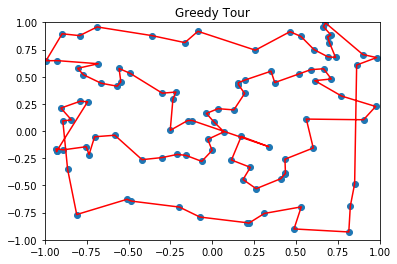

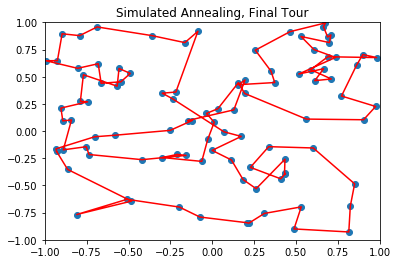

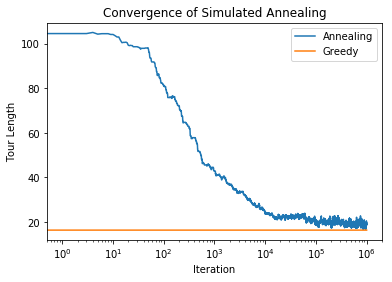

In [10]:
traveling_salesman(100)

## Visualizations for 250 Cities

Greedy Algorithm, Tour Length = 29.641404056509092
Simulated Annealing, Final Tour Length = 37.11529454605906
Runtime = 205.02004528045654


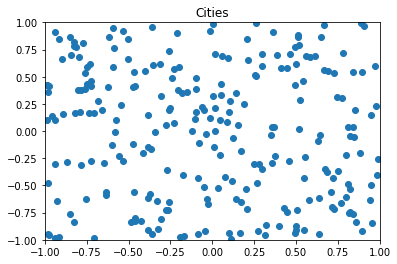

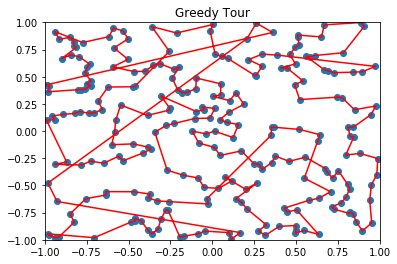

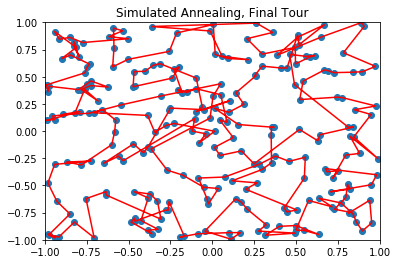

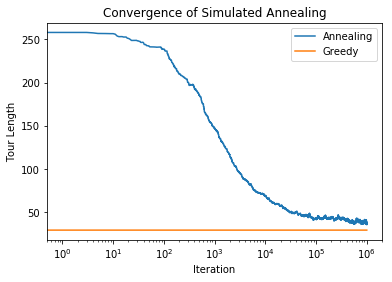

In [11]:
traveling_salesman(250)